<a href="https://colab.research.google.com/github/aya11337/Terrorism-Hotspots/blob/main/Terrorism_Hotspots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv("globalterrorismdb_0718dist.tar.bz2", compression="bz2")


<ipython-input-1-84e26834cea7>:3: DtypeWarning: Columns (5,7,32,34,62,63,64,77,80,91,93,95,97,115,116,122) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("globalterrorismdb_0718dist.tar.bz2", compression="bz2")


In [2]:
df.head()

,Unnamed: 0,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
#How has the number of terrorist activities changed over the years? Are there certain regions where this trend is different from the global averages?
df.columns.values

array(['Unnamed: 0', 'eventid', 'iyear', 'imonth', 'iday', 'approxdate',
       'extended', 'resolution', 'country', 'country_txt', 'region',
       'region_txt', 'provstate', 'city', 'latitude', 'longitude',
       'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'gun

In [7]:
#shape of the data
df.shape

(181691, 136)

In [16]:
# prompt: value counts of the year

df.iyear.value_counts()

,count
iyear,
2014,16903
2015,14965
2016,13587
2013,12036
2017,10900
2012,8522
2011,5076
1992,5071
2010,4826


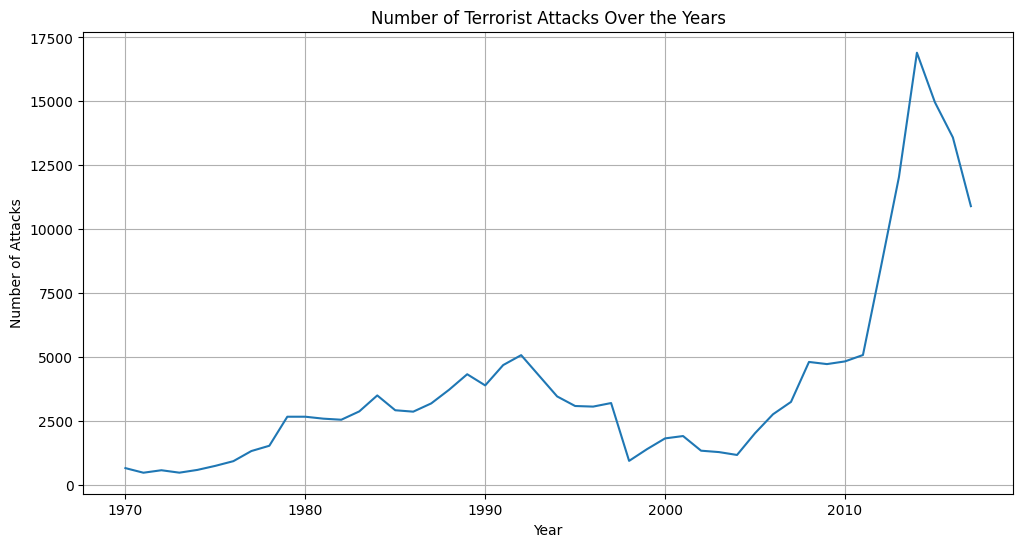

In [8]:

import matplotlib.pyplot as plt

# Group by year and count the number of attacks
yearly_attacks = df['iyear'].value_counts().sort_index()

# Plot the number of attacks over the years
plt.figure(figsize=(12, 6))
yearly_attacks.plot()
plt.title('Number of Terrorist Attacks Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.show()

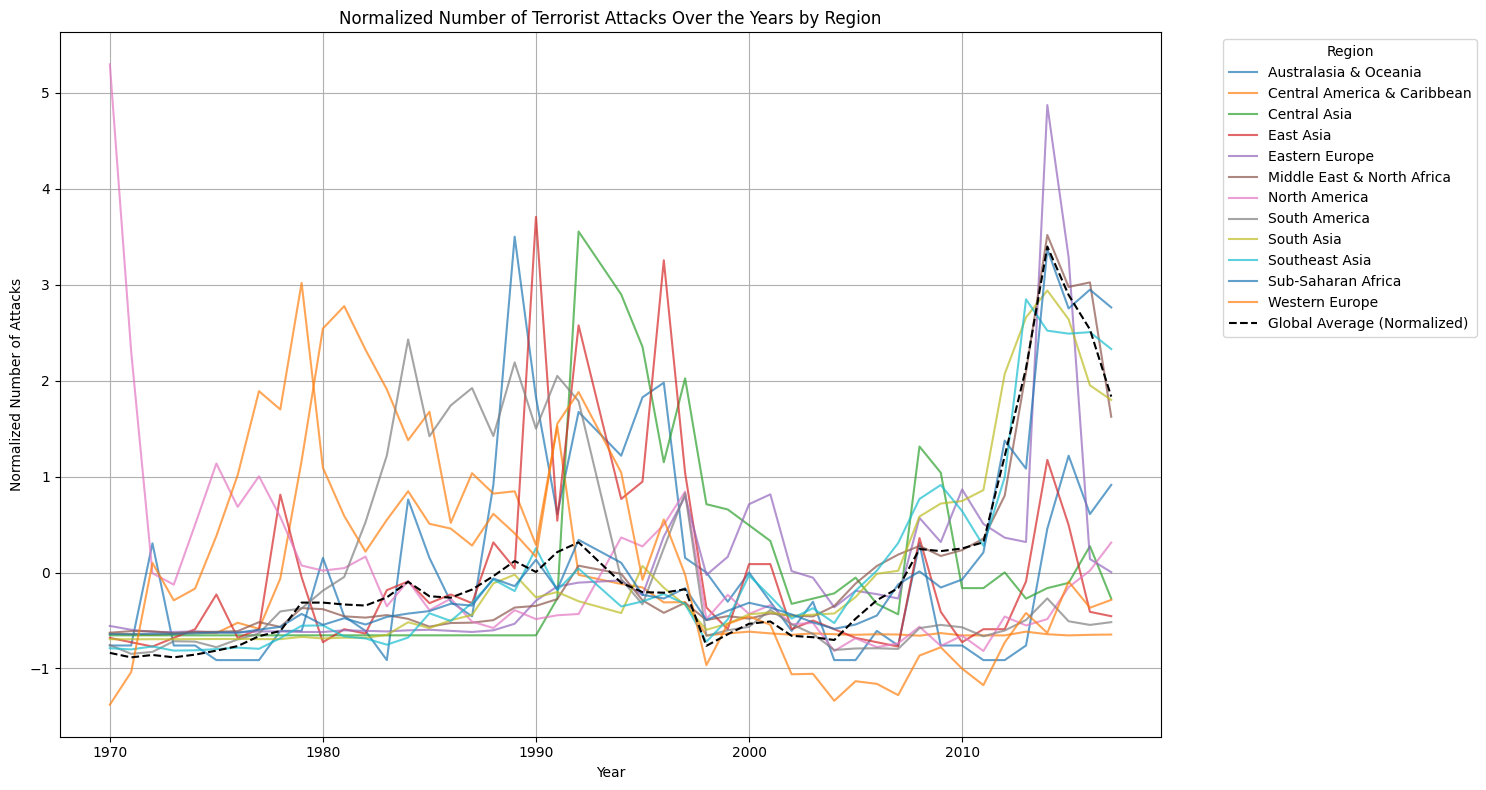

Global Peak Year: 2014

Regional Peak Years:
region_txt
Australasia & Oceania          1989
Central America & Caribbean    1981
Central Asia                   1992
East Asia                      1990
Eastern Europe                 2014
Middle East & North Africa     2014
North America                  1970
South America                  1984
South Asia                     2014
Southeast Asia                 2013
Sub-Saharan Africa             2014
Western Europe                 1979
dtype: int64

Regions with peak years significantly different from the global peak:


,0
region_txt,
Australasia & Oceania,1989
Central America & Caribbean,1981
Central Asia,1992
East Asia,1990
North America,1970
South America,1984
Western Europe,1979


In [9]:
# Analyze trends per region
regional_yearly_attacks = df.groupby(['region_txt', 'iyear']).size().unstack(fill_value=0)

# Calculate global trend for comparison (already done in previous code, but repeating for clarity)
global_yearly_attacks = df['iyear'].value_counts().sort_index()

# Plot regional trends compared to global average
plt.figure(figsize=(15, 8))

# Normalize regional trends for better comparison (optional, but often helpful)
regional_yearly_attacks_normalized = regional_yearly_attacks.apply(lambda x: (x - x.mean()) / x.std(), axis=1)
global_yearly_attacks_normalized = (global_yearly_attacks - global_yearly_attacks.mean()) / global_yearly_attacks.std()


for region in regional_yearly_attacks_normalized.index:
    regional_yearly_attacks_normalized.loc[region].plot(label=region, alpha=0.7)

global_yearly_attacks_normalized.plot(label='Global Average (Normalized)', color='black', linestyle='--')

plt.title('Normalized Number of Terrorist Attacks Over the Years by Region')
plt.xlabel('Year')
plt.ylabel('Normalized Number of Attacks')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# You can also specifically look at regions with potentially different trends
# For example, identify regions where the peak year is significantly different from the global peak
global_peak_year = global_yearly_attacks.idxmax()
regional_peak_years = regional_yearly_attacks.idxmax(axis=1)

print("Global Peak Year:", global_peak_year)
print("\nRegional Peak Years:")
print(regional_peak_years)

# Identify regions with peak years significantly different from the global peak (e.g., more than 5 years difference)
different_peak_regions = regional_peak_years[abs(regional_peak_years - global_peak_year) > 5]
print("\nRegions with peak years significantly different from the global peak:")
different_peak_regions

# Further exploration could involve looking at specific regions identified as different
# For instance, plot the trend for a few of these regions explicitly without normalization
# for region in different_peak_regions.index:
#     plt.figure(figsize=(12, 6))
#     regional_yearly_attacks.loc[region].plot()
#     global_yearly_attacks.plot(label='Global Average', color='black', linestyle='--')
#     plt.title(f'Terrorist Attacks Over the Years in {region}')
#     plt.xlabel('Year')
#     plt.ylabel('Number of Attacks')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

In [11]:
import plotly.express as px

# Calculate the count of each attack type
attack_type_counts = df['attacktype1_txt'].value_counts().reset_index()
attack_type_counts.columns = ['Attack Type', 'Count']

# Create a pie chart using Plotly
fig = px.pie(attack_type_counts, values='Count', names='Attack Type', title='Distribution of Terrorist Attack Types')
fig.show()


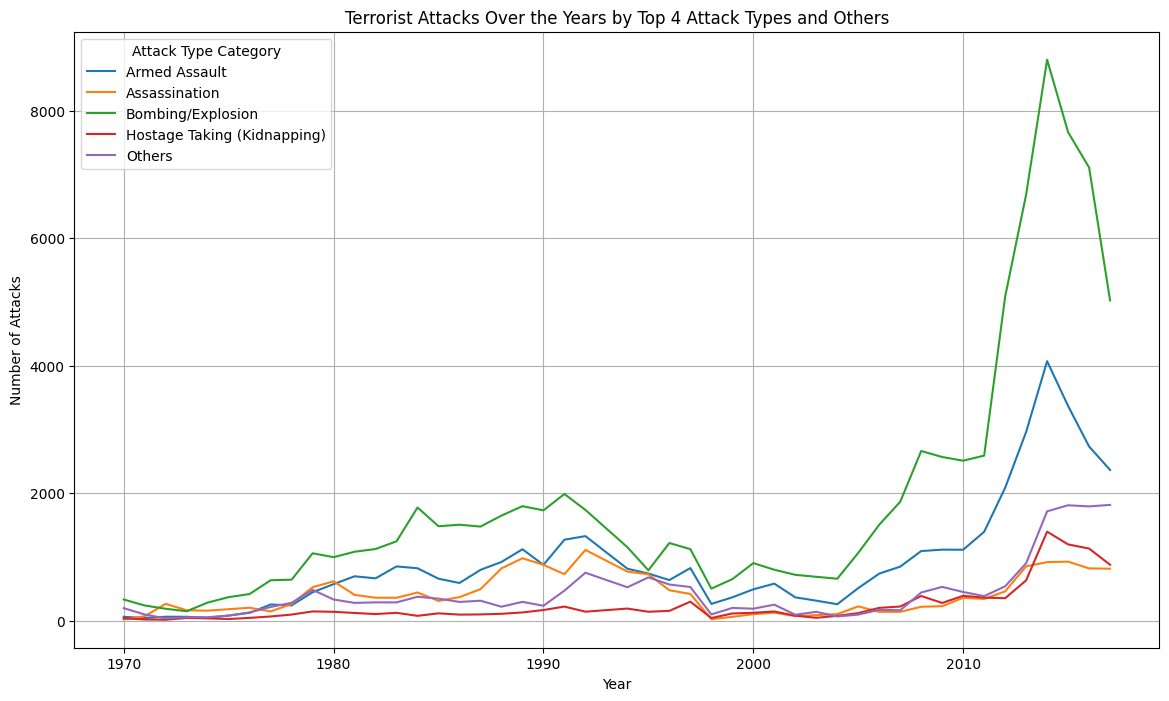

In [12]:


# Group by year and attack type, then count
yearly_attack_type_counts = df.groupby(['iyear', 'attacktype1_txt']).size().reset_index(name='count')

# Find the top 4 attack types overall
top_attack_types = df['attacktype1_txt'].value_counts().nlargest(4).index.tolist()

# Categorize attack types into top 4 and 'Others'
def categorize_attack_type(attack_type):
  if attack_type in top_attack_types:
    return attack_type
  else:
    return 'Others'

yearly_attack_type_counts['attack_category'] = yearly_attack_type_counts['attacktype1_txt'].apply(categorize_attack_type)

# Group by year and the new attack category, summing the counts
yearly_categorized_attacks = yearly_attack_type_counts.groupby(['iyear', 'attack_category'])['count'].sum().unstack(fill_value=0)

# Plot the trends for the top 4 attack types and 'Others'
plt.figure(figsize=(14, 8))

for attack_category in yearly_categorized_attacks.columns:
    yearly_categorized_attacks[attack_category].plot(label=attack_category)

plt.title('Terrorist Attacks Over the Years by Top 4 Attack Types and Others')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend(title='Attack Type Category')
plt.grid(True)
plt.show()

In [15]:
# Group by year and success status, then count
yearly_success_counts = df.groupby(['iyear', 'success']).size().reset_index(name='count')

# Map the success integer to a more descriptive string
yearly_success_counts['success_status'] = yearly_success_counts['success'].map({1: 'Successful', 0: 'Unsuccessful'})

# Create a line plot using Plotly to show successful and unsuccessful attacks over the years
fig = px.line(yearly_success_counts,
              x='iyear',
              y='count',
              color='success_status',
              title='Success of Terrorist Attacks Over the Years',
              labels={'iyear': 'Year', 'count': 'Number of Attacks', 'success_status': 'Attack Outcome'})
fig.show()

# To see the percentage of successful attacks each year:
yearly_total_attacks = yearly_success_counts.groupby('iyear')['count'].sum().reset_index(name='total_count')
yearly_successful_attacks = yearly_success_counts[yearly_success_counts['success'] == 1]

# Merge to calculate the percentage
yearly_success_percentage = pd.merge(yearly_successful_attacks, yearly_total_attacks, on='iyear')
yearly_success_percentage['success_rate'] = (yearly_success_percentage['count'] / yearly_success_percentage['total_count']) * 100

# Create a line plot using Plotly for success rate over the years
fig = px.line(yearly_success_percentage,
              x='iyear',
              y='success_rate',
              title='Percentage of Successful Terrorist Attacks Over the Years',
              labels={'iyear': 'Year', 'success_rate': 'Success Rate (%)'})
fig.show()

In [18]:

# Aggregate attacks by region
regional_attacks = df.groupby('region_txt').size().reset_index(name='number_of_attacks')

# To use plotly express with a world map, you might need region coordinates or a GeoJSON
# Plotly Express can often work with country names directly if they match ISO country codes,
# but for regions, it's more robust if you have centroids or polygons.
# However, let's try to visualize the regional distribution directly using a bar chart first
# as it's a straightforward way to show the hotspots by count.

fig = px.bar(regional_attacks,
             x='region_txt',
             y='number_of_attacks',
             title='Number of Terrorist Attacks by Region',
             labels={'region_txt': 'Region', 'number_of_attacks': 'Number of Attacks'})

# Customize the layout
fig.update_layout(xaxis={'categoryorder':'total descending'}) # Order regions by the number of attacks

fig.show()



# To show hotspots by region on a map, you might consider creating a new DataFrame
# that includes a representative coordinate for each region (e.g., centroid of a major city
# in that region) and then plotting the size of markers based on attack count.
# This requires external data for regional coordinates.

# Let's try to map regions to a representative country for a simpler choropleth approach
# This is an approximation and requires careful mapping
region_to_country = {
    'Middle East & North Africa': 'Iraq', # Example: Iraq is a major country in this region
    'South Asia': 'Pakistan', # Example: Pakistan
    'South America': 'Colombia', # Example: Colombia
    'Western Europe': 'France', # Example: France
    'Southeast Asia': 'Philippines', # Example: Philippines
    'Eastern Europe': 'Russia', # Example: Russia
    'Sub-Saharan Africa': 'Nigeria', # Example: Nigeria
    'Central Asia': 'Afghanistan', # Example: Afghanistan
    'North America': 'United States', # Example: United States
    'East Asia': 'China', # Example: China
    'Central America & Caribbean': 'Mexico', # Example: Mexico
    'Australasia & Oceania': 'Australia' # Example: Australia
}

# Create a DataFrame with attacks per representative country
attacks_per_representative_country = regional_attacks.copy()
attacks_per_representative_country['country'] = attacks_per_representative_country['region_txt'].map(region_to_country)
attacks_per_representative_country = attacks_per_representative_country.dropna(subset=['country']) # Drop regions that weren't mapped

# Aggregate if multiple regions map to the same country (unlikely with this simple mapping)
attacks_per_representative_country = attacks_per_representative_country.groupby('country')['number_of_attacks'].sum().reset_index()

# Create a choropleth map using representative countries
fig = px.choropleth(attacks_per_representative_country,
                    locations="country", # Column with country names
                    locationmode='country names', # Specify that locations are country names
                    color="number_of_attacks", # Column with color values
                    hover_name="country", # Show country name on hover
                    color_continuous_scale="Viridis", # Color scale
                    title='Terrorist Attack Hotspots by Representative Country (Regional Approximation)',
                    labels={'number_of_attacks': 'Number of Attacks'})
fig.show()

print("\nInterpretation of Hotspots:")
print("Based on the bar chart, the regions with the highest number of terrorist attacks are clearly visible. The geographical scatter plot (if shown) provides a visual representation of the density of attack locations. The choropleth map, using representative countries for regions, gives an approximate idea of regional hotspots on a world map, but keep in mind this is a simplification.")


Interpretation of Hotspots:
Based on the bar chart, the regions with the highest number of terrorist attacks are clearly visible. The geographical scatter plot (if shown) provides a visual representation of the density of attack locations. The choropleth map, using representative countries for regions, gives an approximate idea of regional hotspots on a world map, but keep in mind this is a simplification.


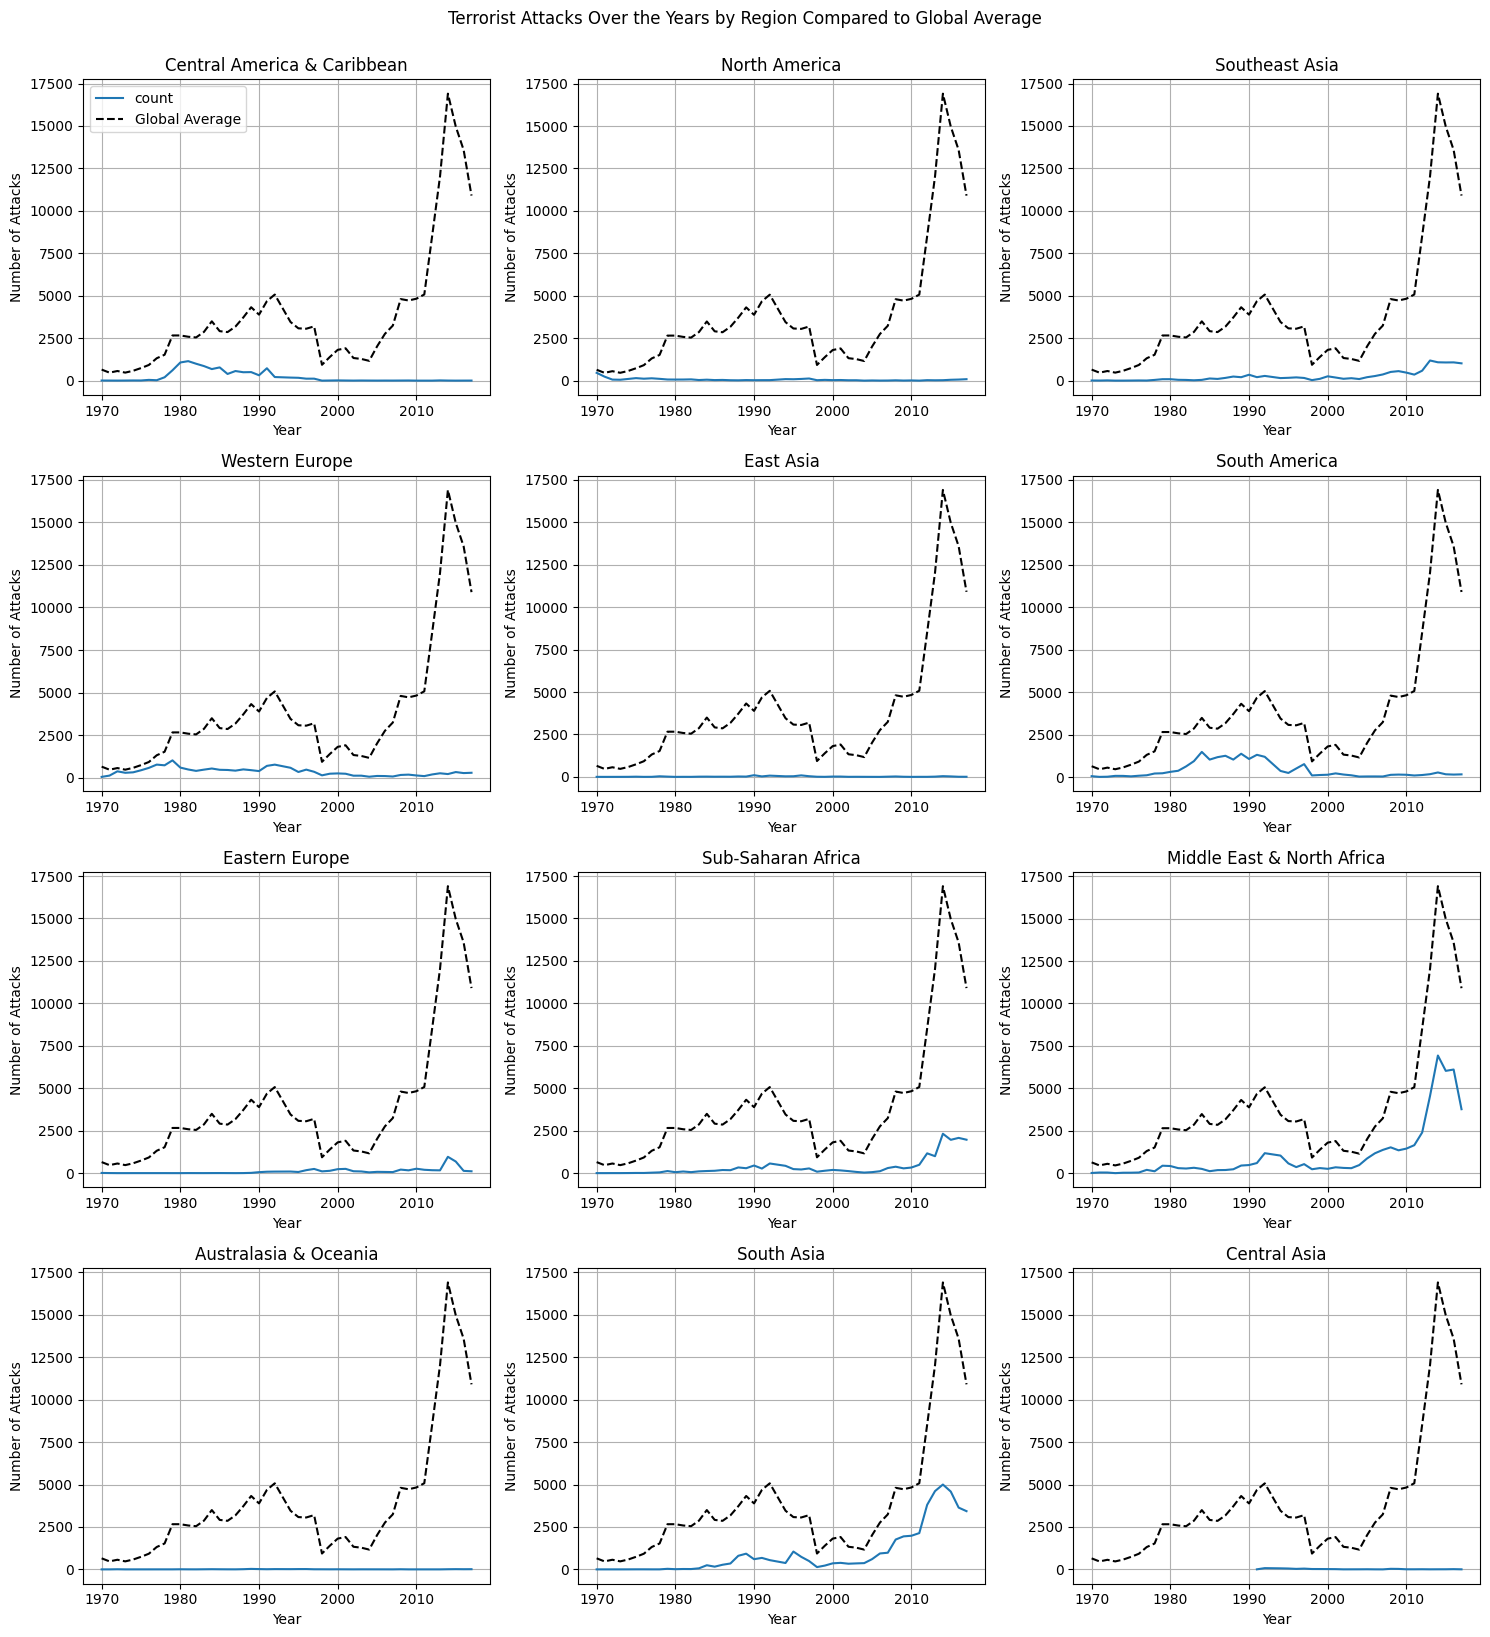

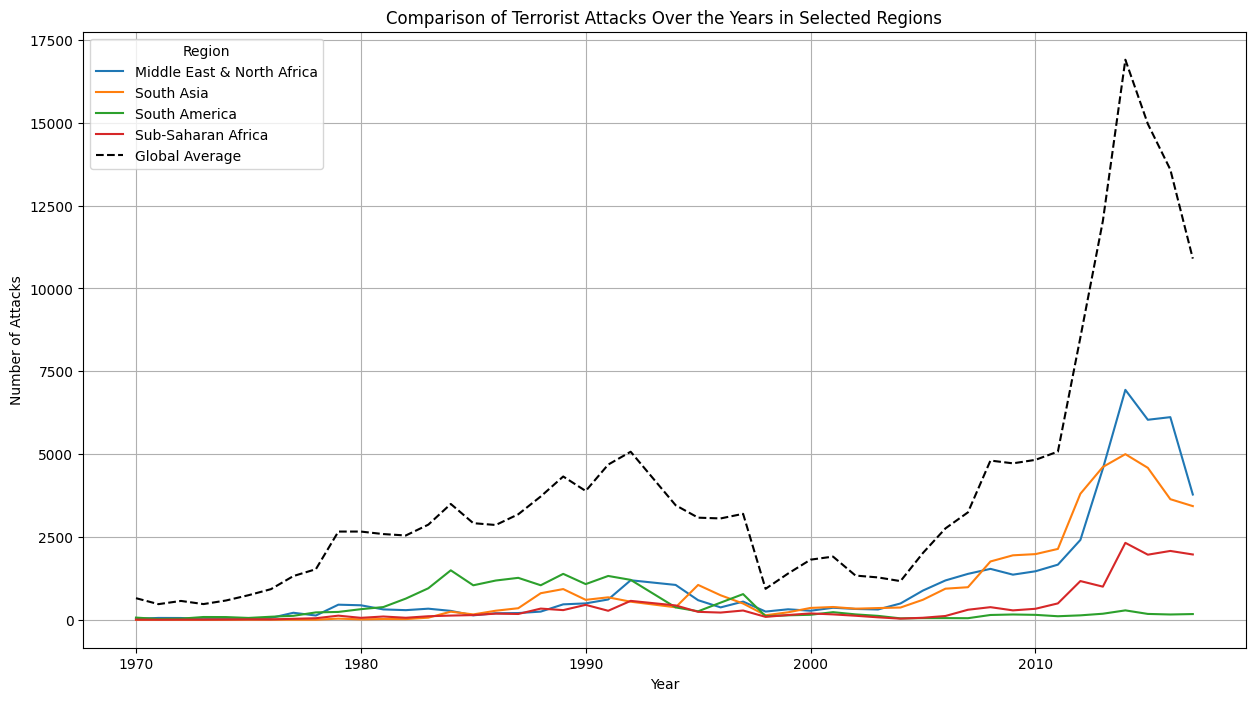

In [19]:
# prompt: show me if attacks increased or decreased over the years in different regions use plotly

# Analyze trends per region over the years using Plotly
regional_yearly_attacks = df.groupby(['region_txt', 'iyear']).size().reset_index(name='number_of_attacks')

fig = px.line(regional_yearly_attacks,
              x='iyear',
              y='number_of_attacks',
              color='region_txt',
              title='Number of Terrorist Attacks Over the Years by Region',
              labels={'iyear': 'Year', 'number_of_attacks': 'Number of Attacks', 'region_txt': 'Region'})
fig.show()
